<img src="./src/header.png">


----

# Moduł 6 - Pandas

---

* Selekcja i filtracja danych
* Grupowanie danych
* Uzupełnianie brakujących danych
* Tworzenie prostych wykresów

<center><img src="https://raw.githubusercontent.com/earthinversion/earthinversion-images/main/images/pandas-python.png" width = "30%"></center>

## Pandas

-----

Pandas "Python Data Analysis Library" to biblioteka będąca najszerzej wykorzystywanym narzędziem w analizie danych w Pythonie.

Dlaczego jest taka popularna?

    Potrafi wczytać dane z plików (CSV, TSV czy SQL) i stworzyć z nich Pythonowy obiekt w formie tabeli
    
    Wprowadza funkcjonalności statystyczne na tabelach znane z oprogramowania jak Excel czy (i jest szybsza)
    
    Jest odpowiednikiem SQL w Pythonie
   
Pandas jest oparty na NumPy <b>(PRĘDKOŚĆ!)</b>

## Pandas a Numpy

-----

Podczas gdy pandas przejmuje wiele idiomów/standardów kodowania z NumPy, największą różnicą jest to, że
pandas jest przeznaczony do pracy z danymi tabelarycznymi lub heterogenicznymi. NumPy, dla porównania, najlepiej nadaje się do pracy z jednorodnymi danymi.
najlepiej nadaje się do pracy z jednorodnymi danymi liczbowymi w postaci tablic.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png" width = "80%"></center>

<center><img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png" width = "100%"></center>

## Import pandasa

-----



In [2]:
import pandas as pd
import numpy as np

## Typy danych pandas 

-----------------

- Serie (Series)
- Ramki (DataFrame)

## Serie

--------

To jednowymiarowy obiekt podobny do wektora, listy lub kolumny w tabeli.

```
s = pd.Series(data, index = index)
```

Danymi mogą być:
- Sekwencja
- Słownik
- Wektor Numpy
- Dane z pliku zewnętrznego*

--------

Wygenerujmy serie

In [5]:
seria = pd.Series([34, "GEODEZJA", 'Człowiek z marmuru', True, 3.23]) #różne typy danych!
seria

0                    34
1              GEODEZJA
2    Człowiek z marmuru
3                  True
4                  3.23
dtype: object

Automatyczna indeksacja to "range" rozpoczynający się od 0:

--------

Wygenerujmy serie z indexem

In [6]:
seria = pd.Series([34, "GEODEZJA", 'Człowiek z marmuru', True, 3.23], 
                  index = ['A', 2, 3, "magnez", 5.5])
seria

A                         34
2                   GEODEZJA
3         Człowiek z marmuru
magnez                  True
5.5                     3.23
dtype: object

--------

Wygenerujmy serie ze słownika

In [7]:
seria = pd.Series({"Film": "Człowiek z marmuru", 'Pi': 3.14}) #ze słownika
seria

Film    Człowiek z marmuru
Pi                    3.14
dtype: object

In [8]:
seria["Film"]

'Człowiek z marmuru'

--------
Seria jest jak słownik, z którego możemy pozyskać wartości na podstawie jego indexu

In [9]:
seria[0]

C:\Users\UPWr\AppData\Local\Temp\ipykernel_22168\2868143558.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seria[0]


'Człowiek z marmuru'

In [10]:
seria.iloc[0]

'Człowiek z marmuru'

--------
Ale możemy też stosować wycinki jak z listy

In [11]:
s = pd.Series(np.random.randint(0,10,5), index=list('abcde'))
s[1:]

b    1
c    0
d    6
e    0
dtype: int32

--------

Możemy traktować je jak wektory i korzystać z opcji manipulacji

In [12]:
s + s

a     4
b     2
c     0
d    12
e     0
dtype: int32

In [13]:
s * 3

a     6
b     3
c     0
d    18
e     0
dtype: int32

## Atrybuty serii

----

In [14]:
seria.size

2

In [15]:
seria.index

Index(['Film', 'Pi'], dtype='object')

In [16]:
help(seria)

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool | None' = None, fastpath: 'bool' = False) -> 'None'
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contain

## Metody serii

----

In [17]:
seria.to_list()

['Człowiek z marmuru', 3.14]

In [18]:
seria.to_dict()

{'Film': 'Człowiek z marmuru', 'Pi': 3.14}

In [20]:
seria = pd.Series(np.arange(5),dtype=int)

In [21]:
seria

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [22]:
seria.astype(float)

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

## DataFrame

------

DataFrame to dwuwymiarowy typ danych - tabela, składająca się z wierszy i kolumn. Można ją sobie wyobrazić jako zestaw Serii, które mają wspólny indeks i unikalną nazwę.

```
df = pd.DataFrame(data, index = index, columns = columns)
```

Danymi mogą być:
- Sekwencja
- Słownik
- Macierz Numpy
- Seria danych pandas
- inny DataFrame
- Dane z pliku zewnętrznego*

------

DataFrame ze słownika

In [25]:
dane = {"raz": np.random.randint(0,10,10),
       "dwa": np.random.randint(10,20,10),
       "trzy": np.random.randint(100,110,10)}
los = pd.DataFrame(dane)
print(los)

   raz  dwa  trzy
0    3   11   101
1    9   10   107
2    8   16   106
3    3   19   107
4    2   16   104
5    3   13   100
6    5   19   106
7    4   10   109
8    6   16   108
9    1   18   104


In [26]:
los

,raz,dwa,trzy
0,3,11,101
1,9,10,107
2,8,16,106
3,3,19,107
4,2,16,104
5,3,13,100
6,5,19,106
7,4,10,109
8,6,16,108
9,1,18,104


------

DataFrame z pliku zewnętrznego

In [28]:
z_csv = pd.read_csv('./data/LISTA5_temperatures.txt',nrows = 10,dtype=float)
z_csv

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800


## Wczytywanie danych tekstowych

----

Uzyskanie dostępu do danych jest często pierwszym krokiem w procesie analizy danych. 

Pandas posiada bogatą bibliotekę funkcji, których zadaniem jest wczytywanie danych tabularycznych jako ramek danych.

Spośród nich wymienie tylko te najbardziej przydatne:
- `read_csv`
- `read_table`
- `read_fwf`
- `read_excel`
- `read_json`
- `read_pickle`

## Metody i atrybuty DataFrame'a

----

In [29]:
z_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #Source  10 non-null     float64
 1   Year     10 non-null     float64
 2   Month    10 non-null     float64
 3   Day      10 non-null     float64
 4   Mean     10 non-null     float64
dtypes: float64(5)
memory usage: 532.0 bytes


----

In [30]:
z_csv.head(8)

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700


## Metody i atrybuty DataFrame'a

----

In [31]:
z_csv.tail(8)

,#Source,Year,Month,Day,Mean
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800


----

In [32]:
z_csv.describe()

,#Source,Year,Month,Day,Mean
count,10.000000,10.0,10.000000,10.0,10.000000
mean,0.500000,2016.0,10.000000,6.0,0.852560
std,0.527046,0.0,1.490712,0.0,0.080416
min,0.000000,2016.0,8.000000,6.0,0.729200
25%,0.000000,2016.0,9.000000,6.0,0.794625
50%,0.500000,2016.0,10.000000,6.0,0.873350
75%,1.000000,2016.0,11.000000,6.0,0.897350
max,1.000000,2016.0,12.000000,6.0,0.980000


----

In [33]:
z_csv.index

RangeIndex(start=0, stop=10, step=1)

In [34]:
z_csv.columns

Index(['#Source', 'Year', 'Month', 'Day', 'Mean'], dtype='object')

In [38]:
z_csv.values

array([[0.000e+00, 2.016e+03, 1.200e+01, 6.000e+00, 7.895e-01],
       [1.000e+00, 2.016e+03, 1.200e+01, 6.000e+00, 8.100e-01],
       [0.000e+00, 2.016e+03, 1.100e+01, 6.000e+00, 7.504e-01],
       [1.000e+00, 2.016e+03, 1.100e+01, 6.000e+00, 9.300e-01],
       [0.000e+00, 2.016e+03, 1.000e+01, 6.000e+00, 7.292e-01],
       [1.000e+00, 2.016e+03, 1.000e+01, 6.000e+00, 8.900e-01],
       [0.000e+00, 2.016e+03, 9.000e+00, 6.000e+00, 8.767e-01],
       [1.000e+00, 2.016e+03, 9.000e+00, 6.000e+00, 8.700e-01],
       [0.000e+00, 2.016e+03, 8.000e+00, 6.000e+00, 8.998e-01],
       [1.000e+00, 2.016e+03, 8.000e+00, 6.000e+00, 9.800e-01]])

----

In [39]:
z_csv.T

,0,1,2,3,4,5,6,7,8,9
#Source,0.0000,1.00,0.0000,1.00,0.0000,1.00,0.0000,1.00,0.0000,1.00
Year,2016.0000,2016.00,2016.0000,2016.00,2016.0000,2016.00,2016.0000,2016.00,2016.0000,2016.00
Month,12.0000,12.00,11.0000,11.00,10.0000,10.00,9.0000,9.00,8.0000,8.00
Day,6.0000,6.00,6.0000,6.00,6.0000,6.00,6.0000,6.00,6.0000,6.00
Mean,0.7895,0.81,0.7504,0.93,0.7292,0.89,0.8767,0.87,0.8998,0.98


----

Sortowanie

In [25]:
z_csv.sort_values(by = "Month", ascending = True)

,#Source,Year,Month,Day,Mean
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100


----

Sortowanie

In [26]:
z_csv.sort_index(axis=1, ascending = False) #Kolumny

,Year,Month,Mean,Day,#Source
0,2016.0,12.0,0.7895,6.0,0.0
1,2016.0,12.0,0.8100,6.0,1.0
2,2016.0,11.0,0.7504,6.0,0.0
3,2016.0,11.0,0.9300,6.0,1.0
4,2016.0,10.0,0.7292,6.0,0.0
5,2016.0,10.0,0.8900,6.0,1.0
6,2016.0,9.0,0.8767,6.0,0.0
7,2016.0,9.0,0.8700,6.0,1.0
8,2016.0,8.0,0.8998,6.0,0.0
9,2016.0,8.0,0.9800,6.0,1.0


## Czy działanie metody zmienia dane?

----


In [44]:
z_csv = pd.read_csv('./data/LISTA5_temperatures.txt',nrows = 10,dtype=float)

In [45]:
z_csv

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800


In [46]:
z_csv.sort_index(axis=1, ascending = False)

,Year,Month,Mean,Day,#Source
0,2016.0,12.0,0.7895,6.0,0.0
1,2016.0,12.0,0.8100,6.0,1.0
2,2016.0,11.0,0.7504,6.0,0.0
3,2016.0,11.0,0.9300,6.0,1.0
4,2016.0,10.0,0.7292,6.0,0.0
5,2016.0,10.0,0.8900,6.0,1.0
6,2016.0,9.0,0.8767,6.0,0.0
7,2016.0,9.0,0.8700,6.0,1.0
8,2016.0,8.0,0.8998,6.0,0.0
9,2016.0,8.0,0.9800,6.0,1.0


In [47]:
z_csv

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800


----

Opcja 1 - Przypisz do tej samej zmiennej zwrócony obiekt

In [57]:
z_csv = z_csv.sort_index(axis=1, ascending = False)
z_csv

,Year,Month,Mean,Day,#Source
0,2016.0,12.0,0.7895,6.0,0.0
1,2016.0,12.0,0.8100,6.0,1.0
2,2016.0,11.0,0.7504,6.0,0.0
3,2016.0,11.0,0.9300,6.0,1.0
4,2016.0,10.0,0.7292,6.0,0.0
5,2016.0,10.0,0.8900,6.0,1.0
6,2016.0,9.0,0.8767,6.0,0.0
7,2016.0,9.0,0.8700,6.0,1.0
8,2016.0,8.0,0.8998,6.0,0.0
9,2016.0,8.0,0.9800,6.0,1.0


----

Opcja2 - atrybut `inplace`

In [49]:
z_csv = pd.read_csv('./data/LISTA5_temperatures.txt',nrows = 10,dtype=float)

In [50]:
z_csv.sort_index(axis=1, ascending = False, inplace=True)
z_csv

,Year,Month,Mean,Day,#Source
0,2016.0,12.0,0.7895,6.0,0.0
1,2016.0,12.0,0.8100,6.0,1.0
2,2016.0,11.0,0.7504,6.0,0.0
3,2016.0,11.0,0.9300,6.0,1.0
4,2016.0,10.0,0.7292,6.0,0.0
5,2016.0,10.0,0.8900,6.0,1.0
6,2016.0,9.0,0.8767,6.0,0.0
7,2016.0,9.0,0.8700,6.0,1.0
8,2016.0,8.0,0.8998,6.0,0.0
9,2016.0,8.0,0.9800,6.0,1.0


## Selekcja danych DataFrame

----

Kolumny/Serie

In [51]:
z_csv["Year"]

0    2016.0
1    2016.0
2    2016.0
3    2016.0
4    2016.0
5    2016.0
6    2016.0
7    2016.0
8    2016.0
9    2016.0
Name: Year, dtype: float64

In [52]:
type(z_csv["Year"])

pandas.core.series.Series

----

Wiersze

In [53]:
z_csv.loc[2]

Year       2016.0000
Month        11.0000
Mean          0.7504
Day           6.0000
#Source       0.0000
Name: 2, dtype: float64

In [54]:
z_csv.loc[0:3]

,Year,Month,Mean,Day,#Source
0,2016.0,12.0,0.7895,6.0,0.0
1,2016.0,12.0,0.8100,6.0,1.0
2,2016.0,11.0,0.7504,6.0,0.0
3,2016.0,11.0,0.9300,6.0,1.0


## Selekcja danych

----

Kombinacja

In [33]:
z_csv["Year"][0:3] # najpierw separujemy Serie, a nastepnie część Serii


0    2016.0
1    2016.0
2    2016.0
Name: Year, dtype: float64

In [34]:
z_csv.loc[:,["Year", "#Source"]]


,Year,#Source
0,2016.0,0.0
1,2016.0,1.0
2,2016.0,0.0
3,2016.0,1.0
4,2016.0,0.0
5,2016.0,1.0
6,2016.0,0.0
7,2016.0,1.0
8,2016.0,0.0
9,2016.0,1.0


----

Kombinacja

In [35]:
z_csv.loc[0:5,["Year",'Mean']]


,Year,Mean
0,2016.0,0.7895
1,2016.0,0.8100
2,2016.0,0.7504
3,2016.0,0.9300
4,2016.0,0.7292
5,2016.0,0.8900


----

Kombinacja

In [55]:
z_csv.iloc[1]

Year       2016.00
Month        12.00
Mean          0.81
Day           6.00
#Source       1.00
Name: 1, dtype: float64

----

Indexowanie logiczne: maski (Numpy)

In [56]:
(z_csv["Month"] < 10)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
Name: Month, dtype: bool

In [57]:
z_csv[(z_csv["Month"] < 10) | (z_csv["Mean"] > .8)] #i lub


,Year,Month,Mean,Day,#Source
1,2016.0,12.0,0.8100,6.0,1.0
3,2016.0,11.0,0.9300,6.0,1.0
5,2016.0,10.0,0.8900,6.0,1.0
6,2016.0,9.0,0.8767,6.0,0.0
7,2016.0,9.0,0.8700,6.0,1.0
8,2016.0,8.0,0.8998,6.0,0.0
9,2016.0,8.0,0.9800,6.0,1.0


## Modyfikacja DataFrame'a

----


In [58]:
z_csv2 = z_csv.copy() # pamiętacie copy ?


In [59]:
z_csv2["Year"] = [2011]*10


In [60]:
z_csv2


,Year,Month,Mean,Day,#Source
0,2011,12.0,0.7895,6.0,0.0
1,2011,12.0,0.8100,6.0,1.0
2,2011,11.0,0.7504,6.0,0.0
3,2011,11.0,0.9300,6.0,1.0
4,2011,10.0,0.7292,6.0,0.0
5,2011,10.0,0.8900,6.0,1.0
6,2011,9.0,0.8767,6.0,0.0
7,2011,9.0,0.8700,6.0,1.0
8,2011,8.0,0.8998,6.0,0.0
9,2011,8.0,0.9800,6.0,1.0


In [61]:
z_csv

,Year,Month,Mean,Day,#Source
0,2016.0,12.0,0.7895,6.0,0.0
1,2016.0,12.0,0.8100,6.0,1.0
2,2016.0,11.0,0.7504,6.0,0.0
3,2016.0,11.0,0.9300,6.0,1.0
4,2016.0,10.0,0.7292,6.0,0.0
5,2016.0,10.0,0.8900,6.0,1.0
6,2016.0,9.0,0.8767,6.0,0.0
7,2016.0,9.0,0.8700,6.0,1.0
8,2016.0,8.0,0.8998,6.0,0.0
9,2016.0,8.0,0.9800,6.0,1.0


----


In [62]:
z_csv2.loc[0, "Year"] = 2016.0
z_csv2

,Year,Month,Mean,Day,#Source
0,2016,12.0,0.7895,6.0,0.0
1,2011,12.0,0.8100,6.0,1.0
2,2011,11.0,0.7504,6.0,0.0
3,2011,11.0,0.9300,6.0,1.0
4,2011,10.0,0.7292,6.0,0.0
5,2011,10.0,0.8900,6.0,1.0
6,2011,9.0,0.8767,6.0,0.0
7,2011,9.0,0.8700,6.0,1.0
8,2011,8.0,0.8998,6.0,0.0
9,2011,8.0,0.9800,6.0,1.0


----


In [63]:
z_csv2["New_Value"] = np.array([5] * len(z_csv2))
z_csv2

,Year,Month,Mean,Day,#Source,New_Value
0,2016,12.0,0.7895,6.0,0.0,5
1,2011,12.0,0.8100,6.0,1.0,5
2,2011,11.0,0.7504,6.0,0.0,5
3,2011,11.0,0.9300,6.0,1.0,5
4,2011,10.0,0.7292,6.0,0.0,5
5,2011,10.0,0.8900,6.0,1.0,5
6,2011,9.0,0.8767,6.0,0.0,5
7,2011,9.0,0.8700,6.0,1.0,5
8,2011,8.0,0.8998,6.0,0.0,5
9,2011,8.0,0.9800,6.0,1.0,5


In [64]:
z_csv2["New_Value"] = 6
z_csv2

,Year,Month,Mean,Day,#Source,New_Value
0,2016,12.0,0.7895,6.0,0.0,6
1,2011,12.0,0.8100,6.0,1.0,6
2,2011,11.0,0.7504,6.0,0.0,6
3,2011,11.0,0.9300,6.0,1.0,6
4,2011,10.0,0.7292,6.0,0.0,6
5,2011,10.0,0.8900,6.0,1.0,6
6,2011,9.0,0.8767,6.0,0.0,6
7,2011,9.0,0.8700,6.0,1.0,6
8,2011,8.0,0.8998,6.0,0.0,6
9,2011,8.0,0.9800,6.0,1.0,6


In [66]:
z_csv2["New_Value2"] = 7
z_csv2

,Year,Month,Mean,Day,#Source,New_Value,New_Value2
0,2016,12.0,0.7895,6.0,0.0,6,7
1,2011,12.0,0.8100,6.0,1.0,6,7
2,2011,11.0,0.7504,6.0,0.0,6,7
3,2011,11.0,0.9300,6.0,1.0,6,7
4,2011,10.0,0.7292,6.0,0.0,6,7
5,2011,10.0,0.8900,6.0,1.0,6,7
6,2011,9.0,0.8767,6.0,0.0,6,7
7,2011,9.0,0.8700,6.0,1.0,6,7
8,2011,8.0,0.8998,6.0,0.0,6,7
9,2011,8.0,0.9800,6.0,1.0,6,7


----


In [67]:
z_csv2['Date'] = z_csv2['Year'].astype(str) + '-' + \
                 z_csv2['Month'].astype(int).astype(str) + '-' + \
                 z_csv2['Day'].astype(int).astype(str)
z_csv2

,Year,Month,Mean,Day,#Source,New_Value,New_Value2,Date
0,2016,12.0,0.7895,6.0,0.0,6,7,2016-12-6
1,2011,12.0,0.8100,6.0,1.0,6,7,2011-12-6
2,2011,11.0,0.7504,6.0,0.0,6,7,2011-11-6
3,2011,11.0,0.9300,6.0,1.0,6,7,2011-11-6
4,2011,10.0,0.7292,6.0,0.0,6,7,2011-10-6
5,2011,10.0,0.8900,6.0,1.0,6,7,2011-10-6
6,2011,9.0,0.8767,6.0,0.0,6,7,2011-9-6
7,2011,9.0,0.8700,6.0,1.0,6,7,2011-9-6
8,2011,8.0,0.8998,6.0,0.0,6,7,2011-8-6
9,2011,8.0,0.9800,6.0,1.0,6,7,2011-8-6


## Brakujące dane

----


In [68]:
df = pd.DataFrame({
'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})
df

,one,two,three
a,-0.242180,-0.645386,NaN
b,0.429902,-1.679400,1.193354
c,-1.363065,0.297399,0.668837
d,NaN,-0.296739,0.328853


----
Zamiana

In [69]:
df.replace(np.nan,10)


,one,two,three
a,-0.242180,-0.645386,10.000000
b,0.429902,-1.679400,1.193354
c,-1.363065,0.297399,0.668837
d,10.000000,-0.296739,0.328853


----

In [46]:
df

,one,two,three
a,-1.162872,-0.587075,NaN
b,1.579917,-0.742378,-0.209039
c,0.071650,-0.526937,0.732927
d,NaN,0.123372,0.936069


In [70]:
df.dropna(how="any") #usuwanie

,one,two,three
b,0.429902,-1.679400,1.193354
c,-1.363065,0.297399,0.668837


In [71]:
df

,one,two,three
a,-0.242180,-0.645386,NaN
b,0.429902,-1.679400,1.193354
c,-1.363065,0.297399,0.668837
d,NaN,-0.296739,0.328853


In [72]:
df.fillna(1e6)

,one,two,three
a,-0.242180,-0.645386,1000000.000000
b,0.429902,-1.679400,1.193354
c,-1.363065,0.297399,0.668837
d,1000000.000000,-0.296739,0.328853


## Statystyki

----

In [73]:
z_csv.describe()

,Year,Month,Mean,Day,#Source
count,10.0,10.000000,10.000000,10.0,10.000000
mean,2016.0,10.000000,0.852560,6.0,0.500000
std,0.0,1.490712,0.080416,0.0,0.527046
min,2016.0,8.000000,0.729200,6.0,0.000000
25%,2016.0,9.000000,0.794625,6.0,0.000000
50%,2016.0,10.000000,0.873350,6.0,0.500000
75%,2016.0,11.000000,0.897350,6.0,1.000000
max,2016.0,12.000000,0.980000,6.0,1.000000


In [74]:
z_csv.describe(percentiles=[.1,0.99])

,Year,Month,Mean,Day,#Source
count,10.0,10.000000,10.000000,10.0,10.000000
mean,2016.0,10.000000,0.852560,6.0,0.500000
std,0.0,1.490712,0.080416,0.0,0.527046
min,2016.0,8.000000,0.729200,6.0,0.000000
10%,2016.0,8.000000,0.748280,6.0,0.000000
50%,2016.0,10.000000,0.873350,6.0,0.500000
99%,2016.0,12.000000,0.975500,6.0,1.000000
max,2016.0,12.000000,0.980000,6.0,1.000000


----

In [78]:
df.mean()

one     -0.391781
two     -0.581031
three    0.730348
dtype: float64

In [79]:
df.std()

one      0.905797
two      0.829260
three    0.435521
dtype: float64

In [80]:
df.min()

one     -1.363065
two     -1.679400
three    0.328853
dtype: float64

## Usuwanie danych - Serie

----

In [81]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [82]:
obj.drop('c')

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

## Usuwanie danych - DataFrame

----

In [83]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


----

In [84]:
data.drop(['Colorado', 'Ohio'],axis=0)

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [85]:
data.drop(['two'],axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


## Działania na danych - ramki

----


In [86]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [87]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [88]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


----


In [89]:
df1+df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


## Działania na danych - DataFrame i Seria

----


In [90]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.loc['Utah']

In [91]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [92]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

----

Domyślne dzialanie na ramce i serii próuje odnaleść pasującą nazwe kolumn

In [102]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [103]:
frame.T - series

,Ohio,Oregon,Texas,Utah,b,d,e
b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
series - frame

,b,d,e
Utah,0.0,0.0,0.0
Ohio,-3.0,-3.0,-3.0
Texas,-6.0,-6.0,-6.0
Oregon,-9.0,-9.0,-9.0


------

In [98]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [99]:
series2

b    0
e    1
f    2
dtype: int64

In [100]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [101]:
frame - series2

,b,d,e,f
Utah,0.0,NaN,1.0,NaN
Ohio,3.0,NaN,4.0,NaN
Texas,6.0,NaN,7.0,NaN
Oregon,9.0,NaN,10.0,NaN


## Działanie funkcją na dane

----


In [110]:
def f(x):
    return x.max() - x.min()

In [111]:
frame.apply(f)

b    9.0
d    9.0
e    9.0
dtype: float64

In [112]:
frame.apply(f,axis=1)

Utah      2.0
Ohio      2.0
Texas     2.0
Oregon    2.0
dtype: float64

----


In [113]:
def f(x):
    return pd.Series([x.max(),x.min(),x.max() - x.min()],index=['max','min','max-min'])

In [114]:
frame.apply(f,axis=0)

,b,d,e
max,9.0,10.0,11.0
min,0.0,1.0,2.0
max-min,9.0,9.0,9.0


In [115]:
frame.apply(f,axis=1)

,max,min,max-min
Utah,2.0,0.0,2.0
Ohio,5.0,3.0,2.0
Texas,8.0,6.0,2.0
Oregon,11.0,9.0,2.0


## Grupowanie danych

----

In [116]:
z_csv = pd.read_csv('./data/LISTA5_temperatures.txt',dtype=float)
z_csv

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
...,...,...,...,...,...
763,1.0,1985.0,3.0,6.0,0.1700
764,0.0,1985.0,2.0,6.0,0.0176
765,1.0,1985.0,2.0,6.0,0.0600
766,0.0,1985.0,1.0,6.0,0.1783


----

Grupowanie przydaje się do:
- Podziału danych na podgrupy
- Stosowania innych funkcji do każdej grupy
- Łączenia danych w inne strukutry

----

In [117]:
pogrupowane = z_csv.groupby("Year")
pogrupowane

In [118]:
for group in pogrupowane:
    print(group)

(1985.0,      #Source    Year  Month  Day    Mean
744      0.0  1985.0   12.0  6.0  0.1978
745      1.0  1985.0   12.0  6.0  0.1500
746      0.0  1985.0   11.0  6.0  0.1181
747      1.0  1985.0   11.0  6.0  0.0900
748      0.0  1985.0   10.0  6.0  0.1303
749      1.0  1985.0   10.0  6.0  0.1100
750      0.0  1985.0    9.0  6.0  0.1010
751      1.0  1985.0    9.0  6.0  0.1400
752      0.0  1985.0    8.0  6.0  0.1287
753      1.0  1985.0    8.0  6.0  0.1500
754      0.0  1985.0    7.0  6.0  0.0779
755      1.0  1985.0    7.0  6.0  0.0000
756      0.0  1985.0    6.0  6.0  0.1290
757      1.0  1985.0    6.0  6.0  0.1700
758      0.0  1985.0    5.0  6.0  0.1959
759      1.0  1985.0    5.0  6.0  0.1700
760      0.0  1985.0    4.0  6.0  0.1488
761      1.0  1985.0    4.0  6.0  0.1100
762      0.0  1985.0    3.0  6.0  0.1875
763      1.0  1985.0    3.0  6.0  0.1700
764      0.0  1985.0    2.0  6.0  0.0176
765      1.0  1985.0    2.0  6.0  0.0600
766      0.0  1985.0    1.0  6.0  0.1783
767    

In [119]:
group

(2016.0,
     #Source    Year  Month  Day    Mean
 0       0.0  2016.0   12.0  6.0  0.7895
 1       1.0  2016.0   12.0  6.0  0.8100
 2       0.0  2016.0   11.0  6.0  0.7504
 3       1.0  2016.0   11.0  6.0  0.9300
 4       0.0  2016.0   10.0  6.0  0.7292
 5       1.0  2016.0   10.0  6.0  0.8900
 6       0.0  2016.0    9.0  6.0  0.8767
 7       1.0  2016.0    9.0  6.0  0.8700
 8       0.0  2016.0    8.0  6.0  0.8998
 9       1.0  2016.0    8.0  6.0  0.9800
 10      0.0  2016.0    7.0  6.0  0.8687
 11      1.0  2016.0    7.0  6.0  0.8300
 12      0.0  2016.0    6.0  6.0  0.9006
 13      1.0  2016.0    6.0  6.0  0.7600
 14      0.0  2016.0    5.0  6.0  0.8738
 15      1.0  2016.0    5.0  6.0  0.9300
 16      0.0  2016.0    4.0  6.0  1.0733
 17      1.0  2016.0    4.0  6.0  1.0900
 18      0.0  2016.0    3.0  6.0  1.2245
 19      1.0  2016.0    3.0  6.0  1.3000
 20      0.0  2016.0    2.0  6.0  1.1921
 21      1.0  2016.0    2.0  6.0  1.3500
 22      0.0  2016.0    1.0  6.0  1.0569
 23    

----

In [120]:
 z_csv.groupby("Year").sum()

,#Source,Month,Day,Mean
Year,,,,
1985.0,12.0,156.0,144.0,3.1409
1986.0,12.0,156.0,144.0,5.0550
1987.0,12.0,156.0,144.0,8.4549
1988.0,12.0,156.0,144.0,9.3985
1989.0,12.0,156.0,144.0,7.0540
1990.0,12.0,156.0,144.0,10.5139
1991.0,12.0,156.0,144.0,10.0055
1992.0,12.0,156.0,144.0,5.8354
1993.0,12.0,156.0,144.0,6.3434


In [121]:
z_csv.groupby("Month").mean()

,#Source,Year,Day,Mean
Month,,,,
1.0,0.5,2000.5,6.0,0.514316
2.0,0.5,2000.5,6.0,0.541103
3.0,0.5,2000.5,6.0,0.569458
4.0,0.5,2000.5,6.0,0.533050
5.0,0.5,2000.5,6.0,0.505384
6.0,0.5,2000.5,6.0,0.502767
7.0,0.5,2000.5,6.0,0.490783
8.0,0.5,2000.5,6.0,0.499150
9.0,0.5,2000.5,6.0,0.499038


In [122]:
z_csv.groupby(["Month","#Source"]).mean()

Year  Day      Mean
Month #Source                       
1.0   0.0      2000.5  6.0  0.506444
      1.0      2000.5  6.0  0.522188
2.0   0.0      2000.5  6.0  0.530644
      1.0      2000.5  6.0  0.551562
3.0   0.0      2000.5  6.0  0.566416
      1.0      2000.5  6.0  0.572500
4.0   0.0      2000.5  6.0  0.537975
      1.0      2000.5  6.0  0.528125
5.0   0.0      2000.5  6.0  0.513894
      1.0      2000.5  6.0  0.496875
6.0   0.0      2000.5  6.0  0.517097
      1.0      2000.5  6.0  0.488438
7.0   0.0      2000.5  6.0  0.496878
      1.0      2000.5  6.0  0.484687
8.0   0.0      2000.5  6.0  0.502988
      1.0      2000.5  6.0  0.495312
9.0   0.0      2000.5  6.0  0.493388
      1.0      2000.5  6.0  0.504688
10.0  0.0      2000.5  6.0  0.500944
      1.0      2000.5  6.0  0.527500
11.0  0.0      2000.5  6.0  0.497862
      1.0      2000.5  6.0  0.515938
12.0  0.0      2000.5  6.0  0.515966
      1.0      2000.5  6.0  0.499063

----

Funkcje agregacyjne
- count()	- Total number of items
- first(), last()	 - First and last item
- mean(), median() -	Mean and median
- min(), max() -	Minimum and maximum
- std(), var() -	Standard deviation and variance
- mad() -	Mean absolute deviation
- sum()	Sum of all items

## Łączenie danych
----

In [99]:
#concat
df = pd.DataFrame(np.random.randn(10, 2))
df2 = pd.DataFrame(np.random.randn(10,2))
print(df)
print(df2)

          0         1
0 -0.291884  1.539050
1 -0.643742  0.872285
2  0.316983 -1.108437
3 -0.938918 -0.274594
4 -2.035412  1.660580
5  0.795549 -1.342700
6  0.284414  0.254836
7  0.531185  0.455946
8  0.148550  1.174902
9 -0.138846  0.387248
          0         1
0  0.656071  0.030616
1  2.027977 -0.163189
2  2.253611 -0.255102
3  0.457822 -0.825706
4 -0.378842  0.476352
5  1.498102  1.446875
6  0.725037 -0.919855
7  0.170000  0.095721
8 -0.041318  0.702911
9 -0.008071 -0.470522


## Łączenie danych
----

In [123]:
newdf= pd.concat([df,df2],axis=1) #axis

In [124]:
newdf

,one,two,three,b,d,e
a,-0.242180,-0.645386,NaN,NaN,NaN,NaN
b,0.429902,-1.679400,1.193354,NaN,NaN,NaN
c,-1.363065,0.297399,0.668837,NaN,NaN,NaN
d,NaN,-0.296739,0.328853,NaN,NaN,NaN
Utah,NaN,NaN,NaN,0.0,1.0,2.0
Ohio,NaN,NaN,NaN,3.0,4.0,5.0
Texas,NaN,NaN,NaN,6.0,7.0,8.0
Oregon,NaN,NaN,NaN,9.0,10.0,11.0


<h3> Serie czasowe </h3>

In [126]:
#Stwórzmy fikcyjny zbiór danych
seria = pd.date_range('1/06/2019', periods=168, freq="1H")
ts = pd.Series(np.random.randint(0,500,168), index=seria)
ts

2019-01-06 00:00:00    375
2019-01-06 01:00:00     97
2019-01-06 02:00:00    207
2019-01-06 03:00:00    145
2019-01-06 04:00:00     49
                      ... 
2019-01-12 19:00:00    382
2019-01-12 20:00:00    457
2019-01-12 21:00:00    231
2019-01-12 22:00:00    343
2019-01-12 23:00:00    238
Freq: H, Length: 168, dtype: int32

<h3> Przycinanie </h3>

In [127]:
ts.truncate(before='2019-01-10',after = '2019-01-11')

2019-01-10 00:00:00    234
2019-01-10 01:00:00    218
2019-01-10 02:00:00    484
2019-01-10 03:00:00    366
2019-01-10 04:00:00    499
2019-01-10 05:00:00    345
2019-01-10 06:00:00    182
2019-01-10 07:00:00    248
2019-01-10 08:00:00    407
2019-01-10 09:00:00    136
2019-01-10 10:00:00    183
2019-01-10 11:00:00    104
2019-01-10 12:00:00    397
2019-01-10 13:00:00    430
2019-01-10 14:00:00    488
2019-01-10 15:00:00    119
2019-01-10 16:00:00    183
2019-01-10 17:00:00    314
2019-01-10 18:00:00     36
2019-01-10 19:00:00    481
2019-01-10 20:00:00    427
2019-01-10 21:00:00    494
2019-01-10 22:00:00     12
2019-01-10 23:00:00     31
2019-01-11 00:00:00    101
Freq: H, dtype: int32

In [128]:
ts['2019-01-10':'2019-01-10']

2019-01-10 00:00:00    234
2019-01-10 01:00:00    218
2019-01-10 02:00:00    484
2019-01-10 03:00:00    366
2019-01-10 04:00:00    499
2019-01-10 05:00:00    345
2019-01-10 06:00:00    182
2019-01-10 07:00:00    248
2019-01-10 08:00:00    407
2019-01-10 09:00:00    136
2019-01-10 10:00:00    183
2019-01-10 11:00:00    104
2019-01-10 12:00:00    397
2019-01-10 13:00:00    430
2019-01-10 14:00:00    488
2019-01-10 15:00:00    119
2019-01-10 16:00:00    183
2019-01-10 17:00:00    314
2019-01-10 18:00:00     36
2019-01-10 19:00:00    481
2019-01-10 20:00:00    427
2019-01-10 21:00:00    494
2019-01-10 22:00:00     12
2019-01-10 23:00:00     31
Freq: H, dtype: int32

In [129]:
ts.resample('2H').mean()

2019-01-06 00:00:00    236.0
2019-01-06 02:00:00    176.0
2019-01-06 04:00:00     76.5
2019-01-06 06:00:00    295.0
2019-01-06 08:00:00    273.0
                       ...  
2019-01-12 14:00:00    194.0
2019-01-12 16:00:00    228.0
2019-01-12 18:00:00    234.5
2019-01-12 20:00:00    344.0
2019-01-12 22:00:00    290.5
Freq: 2H, Length: 84, dtype: float64

In [130]:
ts.resample('0.5H').interpolate()

2019-01-06 00:00:00    375.0
2019-01-06 00:30:00    236.0
2019-01-06 01:00:00     97.0
2019-01-06 01:30:00    152.0
2019-01-06 02:00:00    207.0
                       ...  
2019-01-12 21:00:00    231.0
2019-01-12 21:30:00    287.0
2019-01-12 22:00:00    343.0
2019-01-12 22:30:00    290.5
2019-01-12 23:00:00    238.0
Freq: 30T, Length: 335, dtype: float64

## Tworzenie prostych wykresów w Pandasie

----

Pandas to narzędzie do analizy danych, które oferuje również świetne opcje wizualizacji danych. 

Wizualizacja danych jest niezbędnym krokiem do powodzenia projektów z zakresu danych - skuteczny wykres mówi więcej niż tysiąc słów.

Wizualizacja danych to potężny sposób na uchwycenie trendów i dzielenie się spostrzeżeniami uzyskanymi z danych. Na półce znajduje się wiele narzędzi do wizualizacji danych z wieloma wyjątkowymi funkcjami, ale w tym samouczku nauczymy się spiskowania z pakietem Pandas.

<center><img src="https://www.quotescosmos.com/img/quotes/Napoleon-I-of-France-quote-15.png" width = "80%"></center>

## metoda plot()

----


Metoda plot ma kilka funkcji kreślenia mających zastosowanie do obiektów DataFrame lub Series, które używają biblioteki Matplotlib, co oznacza, że każdy wykres utworzony przez metode plot() jest obiektem Matplotlib.

In [132]:
import pandas as pd
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 | 

In [133]:
dataset_url = ('https://raw.githubusercontent.com/m-mehdi/pandas_tutorials/main/weekly_stocks.csv')
df = pd.read_csv(dataset_url, parse_dates=['Date'], index_col='Date')
print(df.head())

                  MSFT          FB        AAPL
Date                                          
2021-05-24  249.679993  328.730011  124.610001
2021-05-31  250.789993  330.350006  125.889999
2021-06-07  257.890015  331.260010  127.349998
2021-06-14  259.429993  329.660004  130.460007
2021-06-21  265.019989  341.369995  133.110001


<Axes: xlabel='Date'>

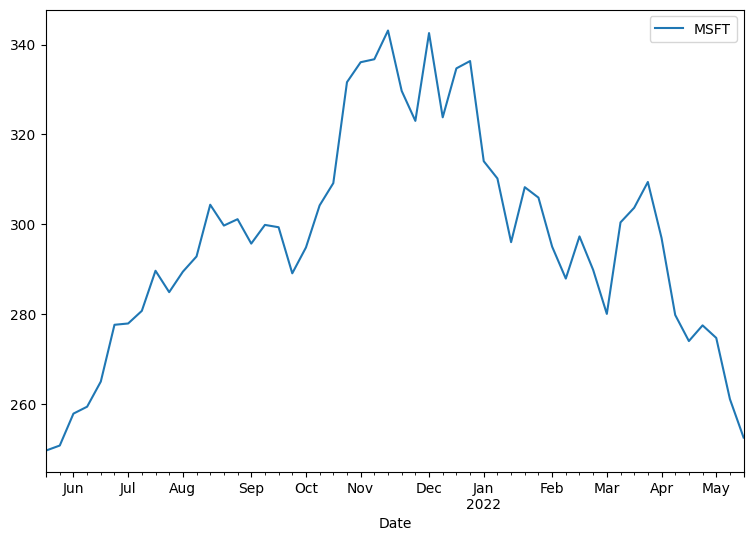

In [134]:
df.plot(y='MSFT', figsize=(9,6))

<Axes: xlabel='Date'>

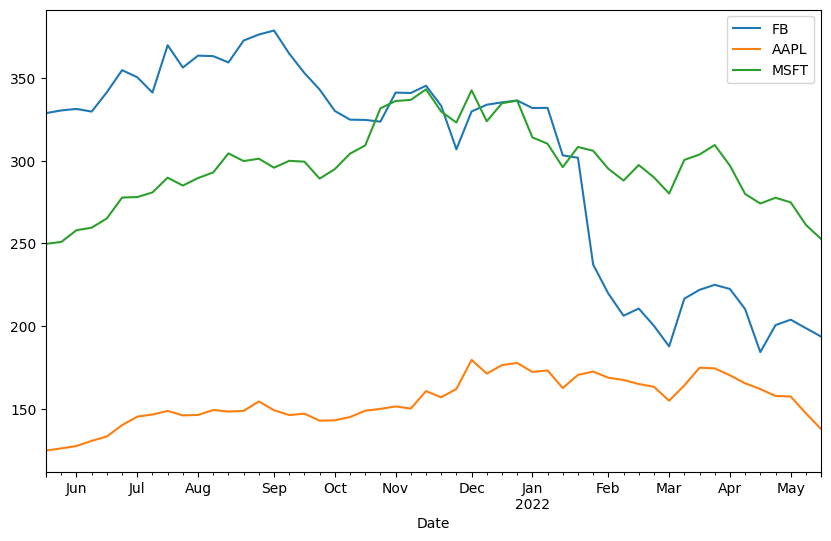

In [135]:
df.plot.line(y=['FB', 'AAPL', 'MSFT'], figsize=(10,6))

<Axes: title={'center': 'Facebook Stock'}, xlabel='Date'>

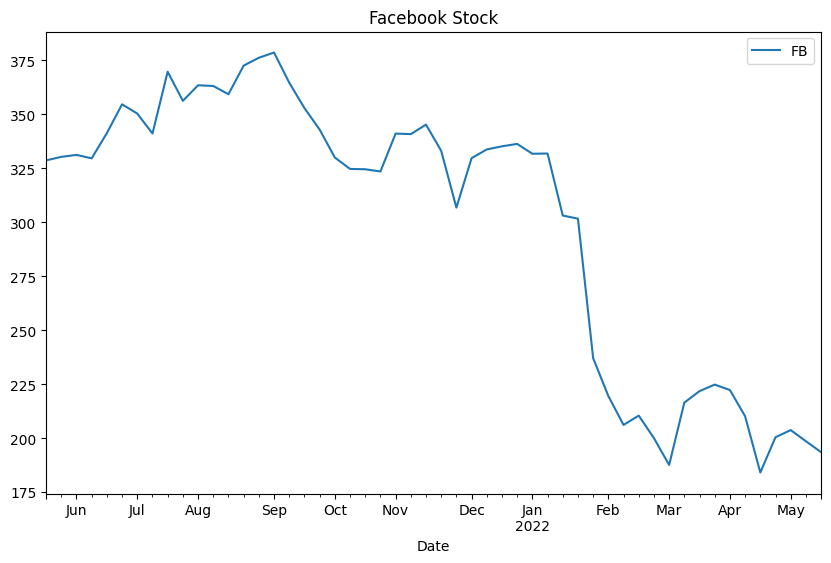

In [136]:
df.plot(y='FB', figsize=(10,6), title='Facebook Stock')

In [137]:
df_3Months = df.resample(rule='M').mean()[-3:]
print(df_3Months)

                  MSFT          FB        AAPL
Date                                          
2022-03-31  298.400002  212.692505  166.934998
2022-04-30  282.087494  204.272499  163.704994
2022-05-31  262.803335  198.643331  147.326665


<Axes: xlabel='Date'>

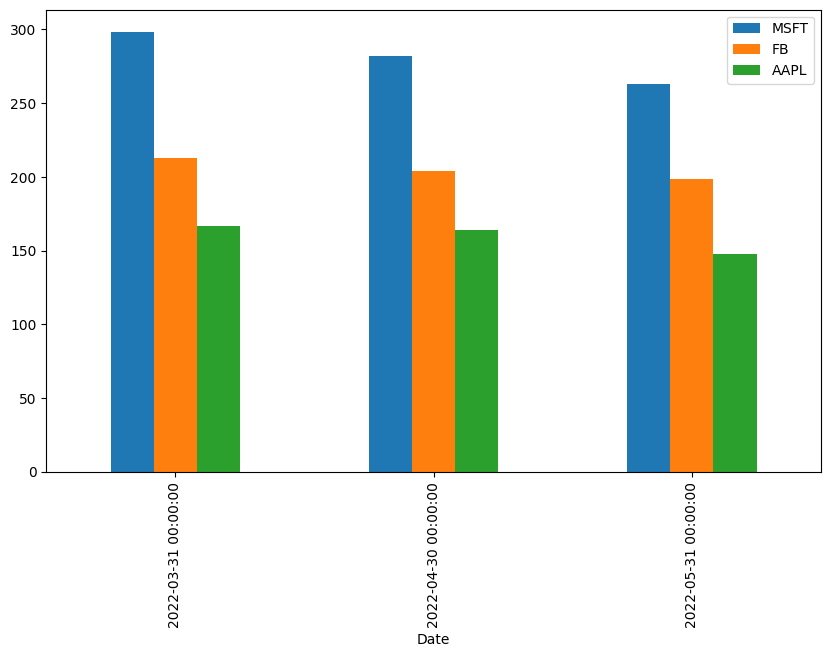

In [138]:
df_3Months.plot(kind='bar', figsize=(10,6))

<Axes: ylabel='Date'>

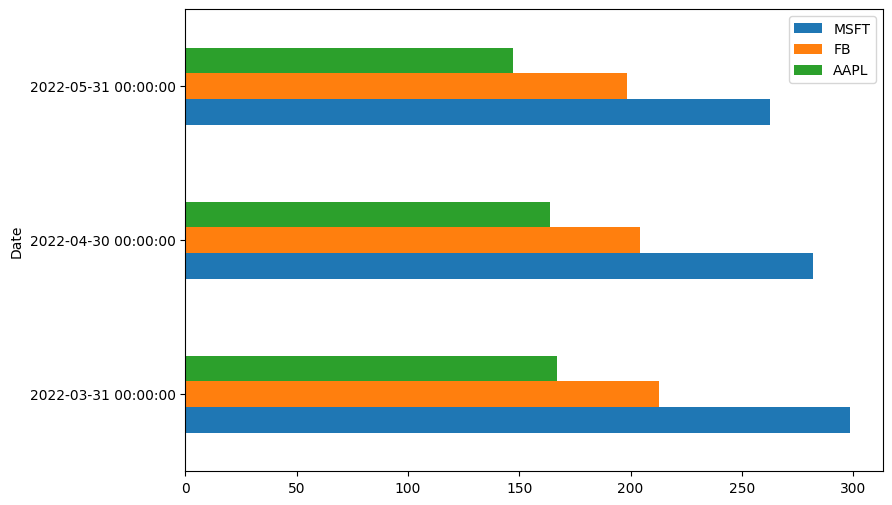

In [139]:
df_3Months.plot(kind='barh', figsize=(9,6))

<Axes: xlabel='Date'>

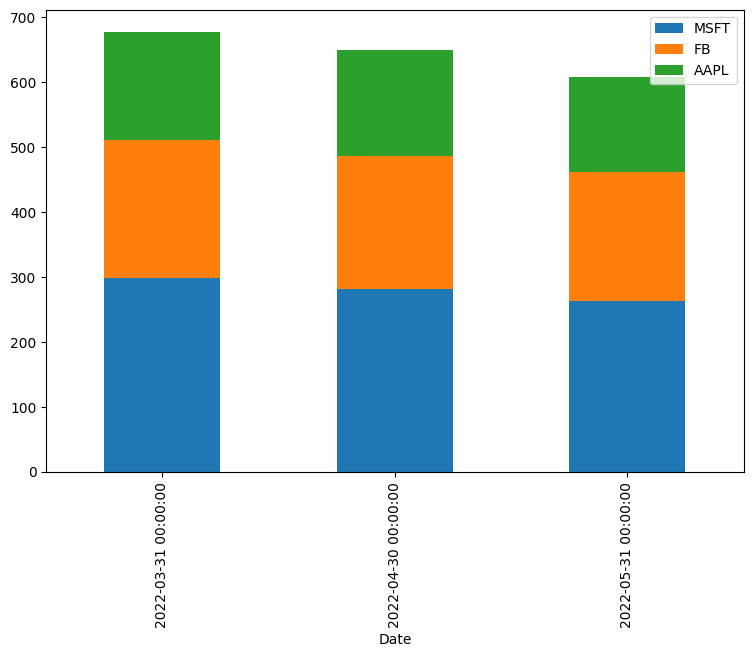

In [140]:
df_3Months.plot(kind='bar', stacked=True, figsize=(9,6))

<Axes: ylabel='Frequency'>

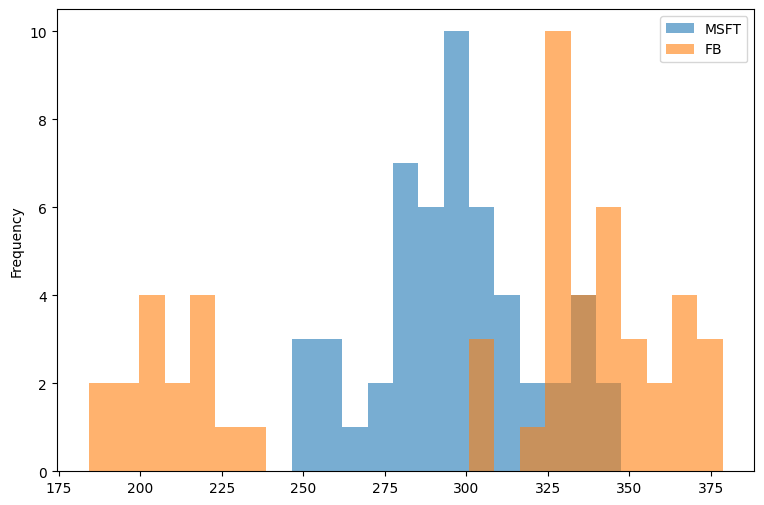

In [141]:
df[['MSFT', 'FB']].plot(kind='hist', bins=25, alpha=0.6, figsize=(9,6))

<Axes: >

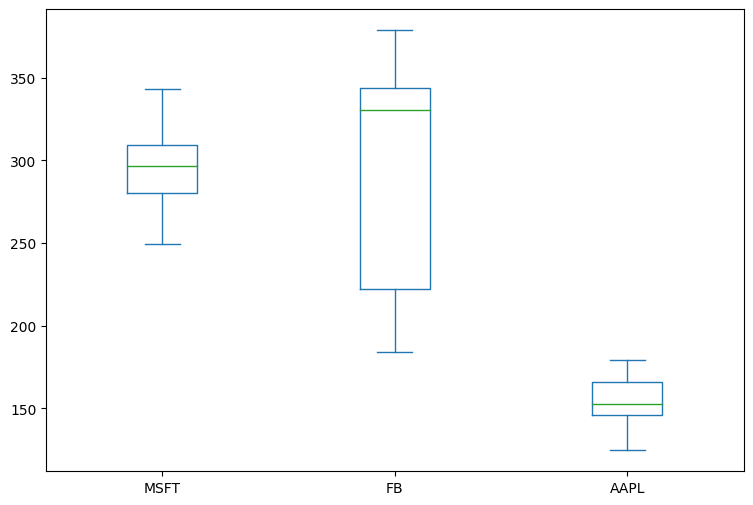

In [142]:
df.plot(kind='box', figsize=(9,6))

<Axes: >

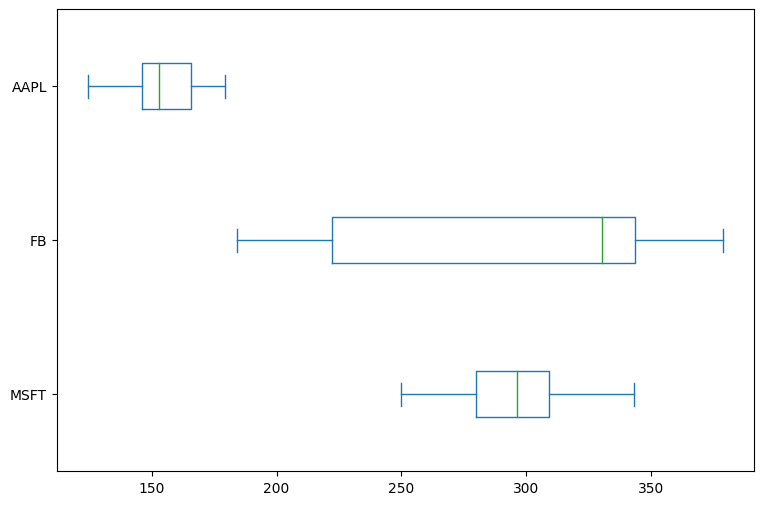

In [143]:
df.plot(kind='box', vert=False, figsize=(9,6))

<Axes: xlabel='Date'>

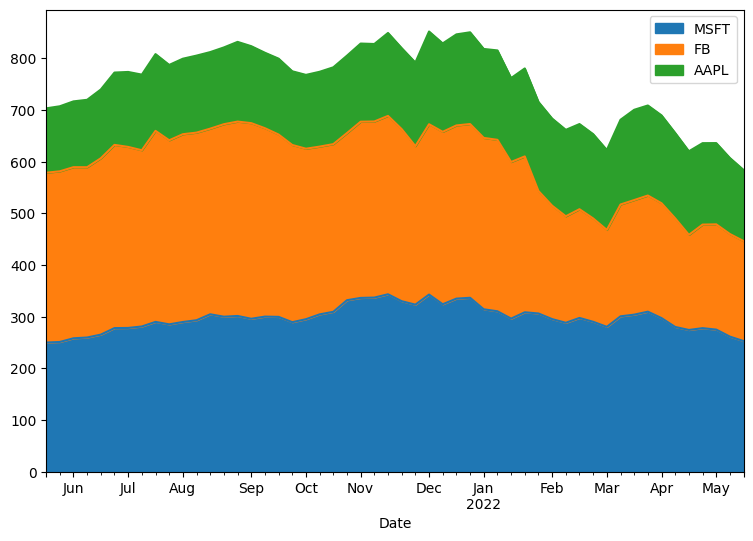

In [144]:
df.plot(kind='area', figsize=(9,6))

<Axes: xlabel='Date'>

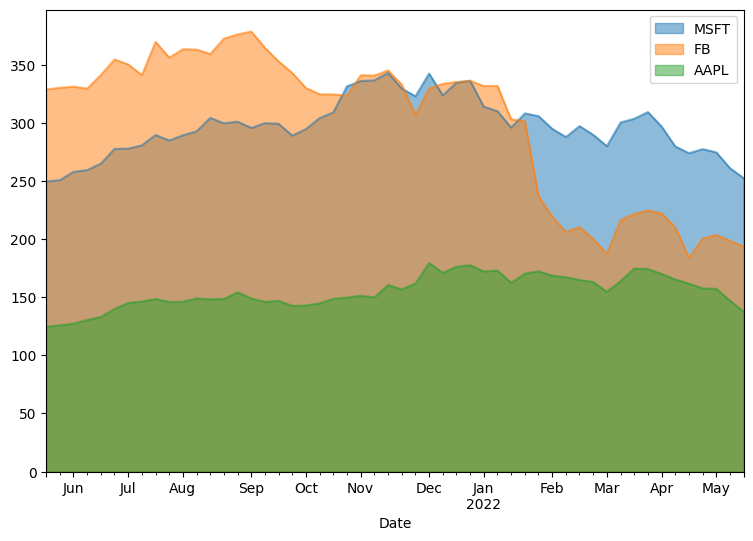

In [145]:
df.plot(kind='area', stacked=False, figsize=(9,6))

<Axes: ylabel='AAPL'>

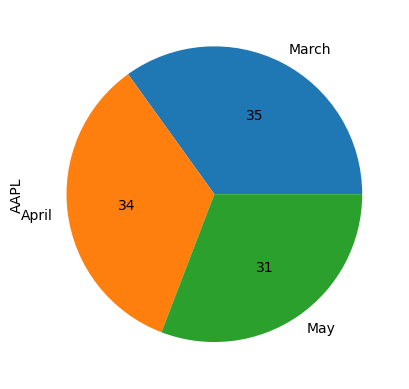

In [146]:
df_3Months.index=['March', 'April', 'May']
df_3Months.plot(kind='pie', y='AAPL', legend=False, autopct='%.f')

array([<Axes: ylabel='MSFT'>, <Axes: ylabel='FB'>, <Axes: ylabel='AAPL'>],
      dtype=object)

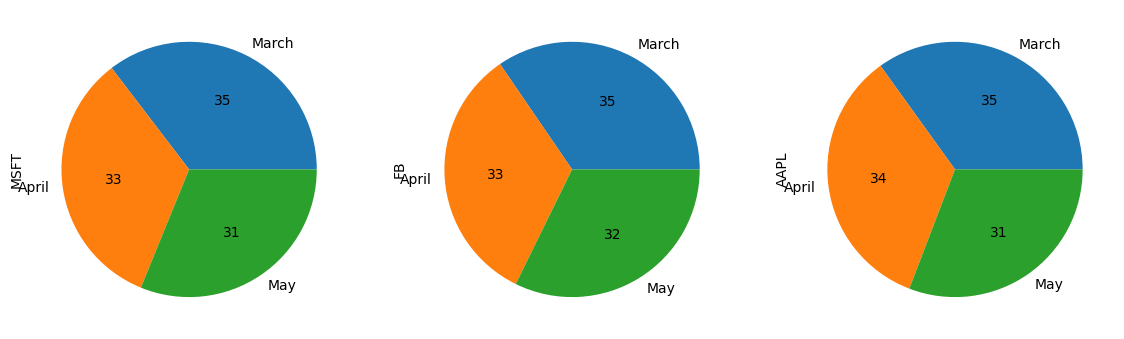

In [147]:
df_3Months.plot(kind='pie', legend=False, autopct='%.f', subplots=True, figsize=(14,8))

<Axes: xlabel='MSFT', ylabel='AAPL'>

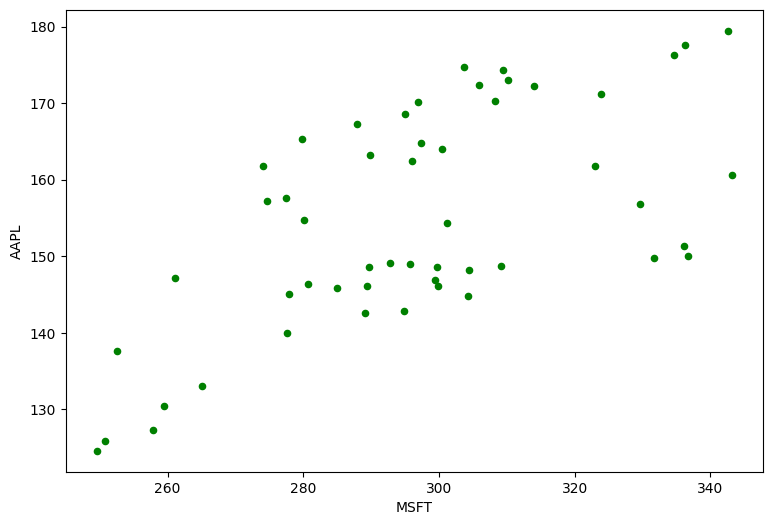

In [148]:
df.plot(kind='scatter', x='MSFT', y='AAPL', figsize=(9,6), color='Green')

<Axes: xlabel='MSFT', ylabel='AAPL'>

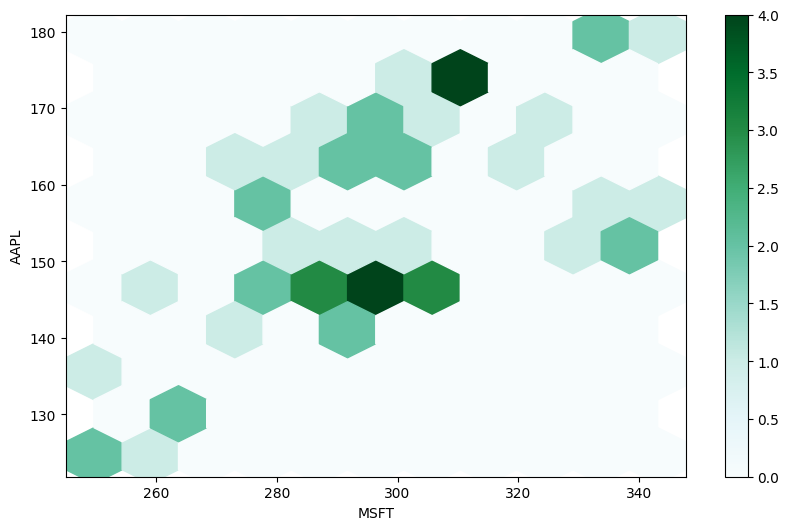

In [149]:
df.plot(kind='hexbin', x='MSFT', y='AAPL', gridsize=10, figsize=(10,6))